#### As a first step we start by importing the packages needed 

##### installing packages

In [110]:
!pip install -U pandasql
!pip install plotly==4.14.3
!pip install dash 

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3-py3-none-any.whl
  Using cached dash_html_components-2.0.0-py3-none-any.whl


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Aya Chammam\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'plotly'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Aya Chammam\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Aya Chammam\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Aya Chammam\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Aya Chammam\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\Aya Chammam\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  

##### Importing packages

In [89]:
import os 
import pandas as  pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline 

In [90]:
import pandasql as pdsql 
from pandasql import sqldf 

In [91]:
from datetime import datetime, timedelta,date
from sklearn.metrics import classification_report,confusion_matrix
from __future__ import division
from sklearn.cluster import KMeans

In [92]:
from sklearn.model_selection import  train_test_split

##### Importing the data

In [93]:
Table_Recharge=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\RECHARGE_LTV.txt",sep=";")
TABLE_RECH_M=sqldf("select code_contrat, ROUND(SUM(MNT_RECHARGE)/6,2) as MNT_RECH_M,  SUM(NB_RECHARGE) as NB_RECH_TOT , ROUND(SUM(NB_RECHARGE)/6,2) as NB_RECH_M  from Table_Recharge group by code_contrat")
#ROUND(SUM(NB_RECHARGE)/6,2) 6 : pour 6mois / 2: 2nb apres virgule

In [94]:
Table_Recharge

,code_contrat,MNT_RECHARGE,NB_RECHARGE,MNT_RECHARGE_SUP5,MNT_RECHARGE_WEEKEND,MOIS
0,1200000134_SB,1.0,1.0,NaN,NaN,7.0
1,1200000134_SB,3.0,3.0,NaN,2.0,9.0
2,1200000134_SB,6.0,6.0,NaN,3.0,11.0
3,1200000134_SB,7.0,7.0,NaN,4.0,10.0
4,1200000134_SB,9.0,9.0,NaN,2.0,8.0
...,...,...,...,...,...,...
961348,1299997543_SB,14.0,6.0,10.0,2.0,11.0
961349,1299997543_SB,15.0,3.0,15.0,5.0,12.0
961350,129999776_SB,5.0,1.0,5.0,NaN,9.0
961351,1299997893_SB,NaN,NaN,NaN,NaN,NaN


In [95]:
TABLE_RECH_M

,code_contrat,MNT_RECH_M,NB_RECH_TOT,NB_RECH_M
0,1200000134_SB,7.50,41.0,6.83
1,120000027_SB,5.00,18.0,3.00
2,1200001912_SB,13.50,17.0,2.83
3,120000256_SB,1.00,6.0,1.00
4,1200002653_SB,7.00,30.0,5.00
...,...,...,...,...
199995,129999696_SB,2.33,6.0,1.00
199996,1299997543_SB,12.67,28.0,4.67
199997,129999776_SB,0.83,1.0,0.17
199998,1299997893_SB,NaN,NaN,NaN


In [96]:
Table_USAGE_SORTANT=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\USAGE_SORTANT_LTV.txt",sep=";")
TABLE_USAGE_SORTANT_LTV_M=sqldf("select code_contrat,ROUND(SUM(DUREE_APPEL_OUT)/6,2) as DUREE_APPEL_OUT_M,SUM(NB_APPEL_OUT) as NB_APPEL_OUT_TOT, ROUND(SUM(REVENU_CDR)/6,2) as REVENU_CDR_M,SUM(NB_SMS_OUT) as NB_SMS_TOT from Table_USAGE_SORTANT group by code_contrat")

In [97]:
Table_USAGE_SORTANT

,code_contrat,DUREE_APPEL_OUT,NB_APPEL_OUT,NB_SMS_OUT,DUREE_APPEL_OUT_G,REVENU_CDR,MOIS
0,1200000134_SB,1.18,12.0,1.0,1.15,0.445,11.0
1,1200000134_SB,6.57,10.0,NaN,6.40,0.385,7.0
2,1200000134_SB,11.45,15.0,NaN,11.45,0.000,10.0
3,1200000134_SB,16.22,11.0,3.0,15.42,0.820,9.0
4,1200000134_SB,28.52,47.0,1.0,27.97,0.820,8.0
...,...,...,...,...,...,...,...
1044927,129999776_SB,287.72,90.0,22.0,0.00,12.635,8.0
1044928,129999776_SB,295.38,160.0,NaN,0.73,13.265,10.0
1044929,129999776_SB,348.05,104.0,5.0,0.00,19.995,9.0
1044930,1299997893_SB,NaN,NaN,NaN,0.00,0.000,NaN


In [98]:
TABLE_USAGE_SORTANT_LTV_M

,code_contrat,DUREE_APPEL_OUT_M,NB_APPEL_OUT_TOT,REVENU_CDR_M,NB_SMS_TOT
0,1200000134_SB,20.20,160.0,0.41,5.0
1,120000027_SB,78.59,380.0,0.21,2.0
2,1200001912_SB,441.23,2443.0,3.67,75.0
3,120000256_SB,3.36,30.0,1.02,1.0
4,1200002653_SB,123.60,585.0,0.20,58.0
...,...,...,...,...,...
199995,129999696_SB,35.81,72.0,2.34,4.0
199996,1299997543_SB,155.45,806.0,11.72,NaN
199997,129999776_SB,184.10,447.0,8.93,27.0
199998,1299997893_SB,NaN,NaN,0.00,NaN


In [99]:
Table_USAGE_ENTRANT=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\USAGE_ENTRANT_LTV.txt",sep=";")
TABLE_USAGE_ENTRANT_LTV_M=sqldf("select code_contrat, ROUND(SUM(DUREE_APPEL_IN)/6,2) as DUREE_APPEL_IN_M from Table_USAGE_ENTRANT group by code_contrat")

In [100]:
Table_USAGE_ENTRANT

,code_contrat,DUREE_APPEL_IN,MOIS
0,1200000134_SB,2.53,8.0
1,1200000134_SB,2.77,9.0
2,1200000134_SB,3.93,7.0
3,1200000134_SB,5.82,11.0
4,1200000134_SB,11.83,10.0
...,...,...,...
1098739,129999776_SB,56.33,9.0
1098740,129999776_SB,76.10,10.0
1098741,1299997893_SB,NaN,7.0
1098742,1299999514_SB,NaN,7.0


In [101]:
TABLE_USAGE_ENTRANT_LTV_M

,code_contrat,DUREE_APPEL_IN_M
0,1200000134_SB,7.19
1,120000027_SB,25.29
2,1200001912_SB,203.48
3,120000256_SB,43.94
4,1200002653_SB,389.99
...,...,...
199995,129999696_SB,12.32
199996,1299997543_SB,103.22
199997,129999776_SB,38.45
199998,1299997893_SB,NaN


In [102]:
Table_USSD=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\USG_USSD_LTV.txt",sep=";")
TABLE_USSD_LTV_M=sqldf("select code_contrat, ROUND(SUM(MNT_FORFAIT)/6,2) as MNT_FORFAIT_M ,SUM(NB_FORFAIT) as NB_FORFAIT_TOT, ROUND(SUM(MNT_FORFAIT_DATA)/6,2) as MNT_FORFAIT_DATA_M ,SUM(NB_FORFAIT_DATA) as NB_FORFAIT_DATA_TOT,ROUND(SUM(MNT_FORFAIT_VOIX)/6,2) as MNT_FORFAIT_DATA_VOIX , SUM(NB_FORFAIT_VOIX) as NB_FORFAIT_VOIX_TOT  from Table_USSD group by code_contrat")

In [103]:
Table_USSD

,code_contrat,MNT_FORFAIT,NB_FORFAIT,MNT_FORFAIT_DATA,NB_FORFAIT_DATA,MNT_FORFAIT_VOIX,NB_FORFAIT_VOIX,MOIS
0,1200000134_SB,2.00,8.0,2.00,8.0,NaN,NaN,9.0
1,1200000134_SB,5.50,22.0,5.50,22.0,NaN,NaN,10.0
2,1200000134_SB,5.90,8.0,5.90,8.0,NaN,NaN,11.0
3,1200000134_SB,6.75,27.0,6.75,27.0,NaN,NaN,8.0
4,1200000134_SB,17.20,18.0,17.20,18.0,NaN,NaN,12.0
...,...,...,...,...,...,...,...,...
533116,129999776_SB,NaN,NaN,NaN,NaN,NaN,NaN,10.0
533117,129999776_SB,0.90,1.0,0.90,1.0,NaN,NaN,7.0
533118,129999776_SB,0.90,1.0,0.90,1.0,NaN,NaN,8.0
533119,1299997893_SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
TABLE_USSD_LTV_M

,code_contrat,MNT_FORFAIT_M,NB_FORFAIT_TOT,MNT_FORFAIT_DATA_M,NB_FORFAIT_DATA_TOT,MNT_FORFAIT_DATA_VOIX,NB_FORFAIT_VOIX_TOT
0,1200000134_SB,6.23,83.0,6.23,83.0,NaN,NaN
1,120000027_SB,0.38,4.0,0.38,4.0,NaN,NaN
2,1200001912_SB,10.17,122.0,NaN,NaN,10.17,122.0
3,120000256_SB,NaN,NaN,NaN,NaN,NaN,NaN
4,1200002653_SB,5.39,34.0,5.08,32.0,0.32,2.0
...,...,...,...,...,...,...,...
199995,129999696_SB,NaN,NaN,NaN,NaN,NaN,NaN
199996,1299997543_SB,NaN,NaN,NaN,NaN,NaN,NaN
199997,129999776_SB,0.30,2.0,0.30,2.0,NaN,NaN
199998,1299997893_SB,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
Table_usg_data=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\USAGE_DATA_LTV.txt",sep=";")
TABLE_USAGE_DATA_LTV_M=sqldf("select code_contrat, SUM(NB_CONNEXION) as NB_CONNEXION_TOT, ROUND(SUM(VOL_SESSION)/6,2) as VOL_SESSION_M   from Table_usg_data group by code_contrat")

In [106]:
Table_usg_data

,code_contrat,NB_CONNEXION,VOL_SESSION,MOIS
0,1200000134_SB,289.0,131.06,7.0
1,1200000134_SB,1578.0,916.44,10.0
2,1200000134_SB,1733.0,894.31,11.0
3,1200000134_SB,1966.0,294.10,9.0
4,1200000134_SB,4558.0,3449.37,12.0
...,...,...,...,...
594751,129999696_SB,NaN,NaN,NaN
594752,1299997543_SB,NaN,NaN,NaN
594753,129999776_SB,NaN,NaN,NaN
594754,1299997893_SB,541.0,1.06,7.0


In [107]:
TABLE_USAGE_DATA_LTV_M

,code_contrat,NB_CONNEXION_TOT,VOL_SESSION_M
0,1200000134_SB,15801.0,1098.24
1,120000027_SB,46685.0,97.36
2,1200001912_SB,329.0,0.63
3,120000256_SB,60.0,0.02
4,1200002653_SB,19843.0,1045.15
...,...,...,...
199995,129999696_SB,NaN,NaN
199996,1299997543_SB,NaN,NaN
199997,129999776_SB,NaN,NaN
199998,1299997893_SB,541.0,0.18


In [108]:
TABLE_DIM_LTV_1 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\TABLE_DIM_LTV_1.csv',sep=";")
TABLE_DIM_LTV_2 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\TABLE_DIM_LTV_2.csv',sep=";")
TABLE_DIM_LTV_3 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\TABLE_DIM_LTV_3.csv',sep=";")
vertical_DIM_LTV = pd.concat([TABLE_DIM_LTV_1,TABLE_DIM_LTV_2,TABLE_DIM_LTV_3], axis=0)

In [109]:
vertical_DIM_LTV

,code_contrat,DATE_ACTIVATION,OFFRE,REGION
0,1233500001_SB,10APR11:14:47:24,PRE - 900 bonus,Tunis
1,1286800001_SB,06APR11:16:16:11,PRE - 900 bonus,Gafsa
2,1250010001_SB,29AUG11:10:03:44,PRE - Doublé,Kebili
3,120120001_SB,19MAY09:00:00:00,PRE - Double Reinstal,Medenine
4,1289220001_SB,18APR11:17:30:12,PRE - 900 bonus,Sidi Bouzid
...,...,...,...,...
66661,125535999_SB,02SEP11:10:54:49,PRE - TT 1500%,Medenine
66662,124508999_SB,24JUN11:09:00:46,PRE - TT 1500%,Medenine
66663,123448999_SB,23APR11:10:24:57,PRE - AHLA,Kef
66664,121049999_SB,15JUN11:16:01:22,PRE - offre 40,Tunis


In [110]:
TABLE_FIRST_LAST_USAGE_LTV_1 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\FIRST_LAST_USAGE_LTV_1.csv',sep=";")
TABLE_FIRST_LAST_USAGE_LTV_2 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\FIRST_LAST_USAGE_LTV_2.csv',sep=";")
TABLE_FIRST_LAST_USAGE_LTV_3= pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\FIRST_LAST_USAGE_LTV_3.csv',sep=";")
vertical_FIRST_LAST_USAGE_LTV = pd.concat([TABLE_FIRST_LAST_USAGE_LTV_1,TABLE_FIRST_LAST_USAGE_LTV_2,TABLE_FIRST_LAST_USAGE_LTV_3], axis=0)

In [111]:
vertical_FIRST_LAST_USAGE_LTV 

,code_contrat,LAST_DATE_USAGE,FIRST_DATE_USAGE
0,1233500001_SB,31DEC19:00:00:00,01JUL19:00:00:00
1,1286800001_SB,31DEC19:00:00:00,01JUL19:00:00:00
2,1250010001_SB,02DEC19:00:00:00,03JUL19:00:00:00
3,120120001_SB,30DEC19:00:00:00,01JUL19:00:00:00
4,1289220001_SB,31DEC19:00:00:00,01JUL19:00:00:00
...,...,...,...
66661,125535999_SB,30DEC19:00:00:00,02AUG19:00:00:00
66662,124508999_SB,31DEC19:00:00:00,01JUL19:00:00:00
66663,123448999_SB,28DEC19:00:00:00,03JUL19:00:00:00
66664,121049999_SB,04NOV19:00:00:00,02JUL19:00:00:00


##### Joining the tables 

In [112]:
df1= vertical_DIM_LTV.merge(vertical_FIRST_LAST_USAGE_LTV, on='code_contrat', how='left')

In [113]:
df2=df1.merge(TABLE_RECH_M, on='code_contrat', how='left')

In [114]:
df3= df2.merge(TABLE_USAGE_SORTANT_LTV_M, on='code_contrat', how='left')

In [115]:
df4= df3.merge(TABLE_USAGE_ENTRANT_LTV_M, on='code_contrat', how='left')

In [116]:
df5= df4.merge(TABLE_USAGE_DATA_LTV_M, on='code_contrat', how='left')

In [117]:
dffinal= df5.merge(TABLE_USSD_LTV_M, on='code_contrat', how='left')


In [118]:
dffinal

,code_contrat,DATE_ACTIVATION,OFFRE,REGION,LAST_DATE_USAGE,FIRST_DATE_USAGE,MNT_RECH_M,NB_RECH_TOT,NB_RECH_M,DUREE_APPEL_OUT_M,...,NB_SMS_TOT,DUREE_APPEL_IN_M,NB_CONNEXION_TOT,VOL_SESSION_M,MNT_FORFAIT_M,NB_FORFAIT_TOT,MNT_FORFAIT_DATA_M,NB_FORFAIT_DATA_TOT,MNT_FORFAIT_DATA_VOIX,NB_FORFAIT_VOIX_TOT
0,1233500001_SB,10APR11:14:47:24,PRE - 900 bonus,Tunis,31DEC19:00:00:00,01JUL19:00:00:00,11.33,44.0,7.33,132.23,...,5.0,130.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1286800001_SB,06APR11:16:16:11,PRE - 900 bonus,Gafsa,31DEC19:00:00:00,01JUL19:00:00:00,11.00,14.0,2.33,126.72,...,47.0,52.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1250010001_SB,29AUG11:10:03:44,PRE - Doublé,Kebili,02DEC19:00:00:00,03JUL19:00:00:00,1.83,11.0,1.83,9.89,...,NaN,34.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120120001_SB,19MAY09:00:00:00,PRE - Double Reinstal,Medenine,30DEC19:00:00:00,01JUL19:00:00:00,1.67,2.0,0.33,12.46,...,NaN,50.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1289220001_SB,18APR11:17:30:12,PRE - 900 bonus,Sidi Bouzid,31DEC19:00:00:00,01JUL19:00:00:00,7.00,18.0,3.00,92.69,...,NaN,80.90,NaN,NaN,1.95,13.0,1.95,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125535999_SB,02SEP11:10:54:49,PRE - TT 1500%,Medenine,30DEC19:00:00:00,02AUG19:00:00:00,0.67,4.0,0.67,7.11,...,6.0,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199996,124508999_SB,24JUN11:09:00:46,PRE - TT 1500%,Medenine,31DEC19:00:00:00,01JUL19:00:00:00,5.67,22.0,3.67,54.18,...,10.0,56.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199997,123448999_SB,23APR11:10:24:57,PRE - AHLA,Kef,28DEC19:00:00:00,03JUL19:00:00:00,4.50,23.0,3.83,50.93,...,1.0,1110.34,5051.0,2.19,1.43,9.0,NaN,NaN,1.43,9.0
199998,121049999_SB,15JUN11:16:01:22,PRE - offre 40,Tunis,04NOV19:00:00:00,02JUL19:00:00:00,0.33,2.0,0.33,3.00,...,5.0,11.71,35450.0,103.38,0.62,7.0,0.62,7.0,NaN,NaN


##### Data Cleaning

First of all we will start by removing duplicates

In [119]:
DF=dffinal.drop_duplicates()

Then we imputed the null values by 0 


In [120]:
DF['NB_CONNEXION_TOT']


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
199995        NaN
199996        NaN
199997     5051.0
199998    35450.0
199999        NaN
Name: NB_CONNEXION_TOT, Length: 200000, dtype: float64

In [121]:
DF['NB_RECH_TOT'].fillna(0, inplace=True) #inplace = true 
DF['NB_RECH_M'].fillna(0, inplace=True)
DF['DUREE_APPEL_OUT_M'].fillna(0, inplace=True)
DF['NB_APPEL_OUT_TOT'].fillna(0, inplace=True)
DF['DUREE_APPEL_IN_M'].fillna(0, inplace=True)
DF['NB_CONNEXION_TOT'].fillna(0, inplace=True)
DF['VOL_SESSION_M'].fillna(0, inplace=True)
DF['MNT_FORFAIT_M'].fillna(0, inplace=True)
DF['NB_FORFAIT_TOT'].fillna(0, inplace=True)
DF['MNT_FORFAIT_DATA_M'].fillna(0, inplace=True)
DF['MNT_FORFAIT_DATA_M'].fillna(0, inplace=True)
DF['NB_FORFAIT_DATA_TOT'].fillna(0, inplace=True)
DF['MNT_FORFAIT_DATA_VOIX'].fillna(0, inplace=True)
DF['NB_FORFAIT_VOIX_TOT'].fillna(0, inplace=True)
DF['NB_SMS_TOT'].fillna(0, inplace=True)

In [122]:
DF['NB_CONNEXION_TOT']

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
           ...   
199995        0.0
199996        0.0
199997     5051.0
199998    35450.0
199999        0.0
Name: NB_CONNEXION_TOT, Length: 200000, dtype: float64

In this step we must change the date form in order to calculate the RFM feature

In [123]:
# %d: Two-digit day of the month.
# %b: Month name as 'feb,dec'
# %y: 2-digit year

#%H: Two-digit hour from 00 to 23.
#%M: Two-digit minutes.
#%S: Two-digit seconds.
DF['FIRST_DATE_USAGE']

0         01JUL19:00:00:00
1         01JUL19:00:00:00
2         03JUL19:00:00:00
3         01JUL19:00:00:00
4         01JUL19:00:00:00
                ...       
199995    02AUG19:00:00:00
199996    01JUL19:00:00:00
199997    03JUL19:00:00:00
199998    02JUL19:00:00:00
199999    02JUL19:00:00:00
Name: FIRST_DATE_USAGE, Length: 200000, dtype: object

In [131]:
DF['FIRST_DATE_USAGE']=pd.to_datetime(DF['FIRST_DATE_USAGE'],format='%d%b%y:%H:%M:%S') #changer le type de texte => date
DF['LAST_DATE_USAGE']=pd.to_datetime(DF['FIRST_DATE_USAGE'],format='%d%b%y:%H:%M:%S')
DF.insert(1, 'DERNIERE_TRANSACTION', '2019-12-31')
DF['LAST_DATE_USAGE']-DF['FIRST_DATE_USAGE'] #pour tester si le type a changé 


0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
199995   0 days
199996   0 days
199997   0 days
199998   0 days
199999   0 days
Length: 200000, dtype: timedelta64[ns]

In [132]:
DF['FIRST_DATE_USAGE']

0        2019-07-01
1        2019-07-01
2        2019-07-03
3        2019-07-01
4        2019-07-01
            ...    
199995   2019-08-02
199996   2019-07-01
199997   2019-07-03
199998   2019-07-02
199999   2019-07-02
Name: FIRST_DATE_USAGE, Length: 200000, dtype: datetime64[ns]

nous devons calculer la derniere transaction afin de calculer la recency 

In [133]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   code_contrat           200000 non-null  object        
 1   DERNIERE_TRANSACTION   200000 non-null  object        
 2   DATE_ACTIVATION        199998 non-null  object        
 3   OFFRE                  200000 non-null  object        
 4   REGION                 200000 non-null  object        
 5   LAST_DATE_USAGE        196180 non-null  datetime64[ns]
 6   FIRST_DATE_USAGE       196180 non-null  datetime64[ns]
 7   MNT_RECH_M             192325 non-null  float64       
 8   NB_RECH_TOT            200000 non-null  float64       
 9   NB_RECH_M              200000 non-null  float64       
 10  DUREE_APPEL_OUT_M      200000 non-null  float64       
 11  NB_APPEL_OUT_TOT       200000 non-null  float64       
 12  REVENU_CDR_M           200000 non-null  floa

in this step we will change the format of text type variables to date ones 

In [134]:
DF.DERNIERE_TRANSACTION=pd.to_datetime(DF.DERNIERE_TRANSACTION)
DF.LAST_DATE_USAGE  =pd.to_datetime(DF.LAST_DATE_USAGE)
DF.FIRST_DATE_USAGE=pd.to_datetime(DF.FIRST_DATE_USAGE)

before starting we must explain the notion of RFM marketing:

its a segmentation method often used in direct marketing.

Recency: date of last purchase 

Frequency: frequency of purchases over the period studied 

Monetary : value of purchases made by the customer over the period studied.

##### Recency


In [135]:
DF['DIFFDATE']=(DF['DERNIERE_TRANSACTION']-DF['LAST_DATE_USAGE']).dt.days
DF['DIFFDATE']

0         183.0
1         183.0
2         181.0
3         183.0
4         183.0
          ...  
199995    151.0
199996    183.0
199997    181.0
199998    182.0
199999    182.0
Name: DIFFDATE, Length: 200000, dtype: float64

In [136]:
DF.DIFFDATE.describe()


count    196180.000000
mean        177.724182
std          16.667596
min           0.000000
25%         181.000000
50%         183.000000
75%         183.000000
max         183.000000
Name: DIFFDATE, dtype: float64

##### Frequency


In [137]:
startdt=pd.to_datetime('2019-07-01')
enddt = pd.to_datetime('2019-12-31')
periode_analyse=len(pd.date_range(start=startdt,end=enddt,freq='D'))
periode_analyse

184

In [138]:
DF['FREQUENCY']=periode_analyse/(DF['NB_APPEL_OUT_TOT']+DF['NB_SMS_TOT']+DF['NB_CONNEXION_TOT'])
DF['FREQUENCY'] 

0         0.189495
1         0.219570
2         4.181818
3         2.920635
4         0.258065
            ...   
199995    4.972973
199996    0.470588
199997    0.035141
199998    0.005185
199999    0.575000
Name: FREQUENCY, Length: 200000, dtype: float64

##### Monetary


In [139]:
tablefinal =sqldf(" SELECT * , REVENU_CDR_M+MNT_FORFAIT_M as ARPU from DF ")
#arpu = monetaire 

##### Customer History
Ancienneté = customer history

In [140]:
#Changing the form of Activation Date
DF['DATE_ACTIVATION']=pd.to_datetime(DF['DATE_ACTIVATION'],format='%d%b%y:%H:%M:%S')
DF['DATE_ACTIVATION']

0        2011-04-10 14:47:24
1        2011-04-06 16:16:11
2        2011-08-29 10:03:44
3        2009-05-19 00:00:00
4        2011-04-18 17:30:12
                 ...        
199995   2011-09-02 10:54:49
199996   2011-06-24 09:00:46
199997   2011-04-23 10:24:57
199998   2011-06-15 16:01:22
199999   2011-05-23 16:36:32
Name: DATE_ACTIVATION, Length: 200000, dtype: datetime64[ns]

In [141]:
DF['ANCIENNETE']=(DF['DERNIERE_TRANSACTION']-DF['DATE_ACTIVATION']).dt.days
DF['ANCIENNETE']

0         3186.0
1         3190.0
2         3045.0
3         3878.0
4         3178.0
           ...  
199995    3041.0
199996    3111.0
199997    3173.0
199998    3120.0
199999    3143.0
Name: ANCIENNETE, Length: 200000, dtype: float64

In [142]:
DF

,code_contrat,DERNIERE_TRANSACTION,DATE_ACTIVATION,OFFRE,REGION,LAST_DATE_USAGE,FIRST_DATE_USAGE,MNT_RECH_M,NB_RECH_TOT,NB_RECH_M,...,VOL_SESSION_M,MNT_FORFAIT_M,NB_FORFAIT_TOT,MNT_FORFAIT_DATA_M,NB_FORFAIT_DATA_TOT,MNT_FORFAIT_DATA_VOIX,NB_FORFAIT_VOIX_TOT,DIFFDATE,FREQUENCY,ANCIENNETE
0,1233500001_SB,2019-12-31,2011-04-10 14:47:24,PRE - 900 bonus,Tunis,2019-07-01,2019-07-01,11.33,44.0,7.33,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,183.0,0.189495,3186.0
1,1286800001_SB,2019-12-31,2011-04-06 16:16:11,PRE - 900 bonus,Gafsa,2019-07-01,2019-07-01,11.00,14.0,2.33,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,183.0,0.219570,3190.0
2,1250010001_SB,2019-12-31,2011-08-29 10:03:44,PRE - Doublé,Kebili,2019-07-03,2019-07-03,1.83,11.0,1.83,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,181.0,4.181818,3045.0
3,120120001_SB,2019-12-31,2009-05-19 00:00:00,PRE - Double Reinstal,Medenine,2019-07-01,2019-07-01,1.67,2.0,0.33,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,183.0,2.920635,3878.0
4,1289220001_SB,2019-12-31,2011-04-18 17:30:12,PRE - 900 bonus,Sidi Bouzid,2019-07-01,2019-07-01,7.00,18.0,3.00,...,0.00,1.95,13.0,1.95,13.0,0.00,0.0,183.0,0.258065,3178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125535999_SB,2019-12-31,2011-09-02 10:54:49,PRE - TT 1500%,Medenine,2019-08-02,2019-08-02,0.67,4.0,0.67,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,151.0,4.972973,3041.0
199996,124508999_SB,2019-12-31,2011-06-24 09:00:46,PRE - TT 1500%,Medenine,2019-07-01,2019-07-01,5.67,22.0,3.67,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,183.0,0.470588,3111.0
199997,123448999_SB,2019-12-31,2011-04-23 10:24:57,PRE - AHLA,Kef,2019-07-03,2019-07-03,4.50,23.0,3.83,...,2.19,1.43,9.0,0.00,0.0,1.43,9.0,181.0,0.035141,3173.0
199998,121049999_SB,2019-12-31,2011-06-15 16:01:22,PRE - offre 40,Tunis,2019-07-02,2019-07-02,0.33,2.0,0.33,...,103.38,0.62,7.0,0.62,7.0,0.00,0.0,182.0,0.005185,3120.0


in this step we will divide the sets of variables (recency, frequency, value) into groups

equal each containing the same fraction of the total population.

In [143]:
quintiles =tablefinal[['DIFFDATE', 'FREQUENCY', 'ARPU']].quantile([.2, .4, .6, .8]).to_dict()
quintiles
#quintile : fct divide distribution into equal groups, each containing the same fraction of the total population.
#to_dict :Convert the DataFrame to a dictionary.

{'DIFFDATE': {0.2: 179.0, 0.4: 182.0, 0.6: 183.0, 0.8: 183.0},
 'FREQUENCY': {0.2: 0.015517997521285626,
  0.4: 0.07559572719802794,
  0.6: 0.23927178153446033,
  0.8: 0.8214285714285714},
 'ARPU': {0.2: 1.59, 0.4: 4.27, 0.6: 8.47, 0.8: 15.12}}

then we will assign a value for each interval 

In [144]:
def r_score(x):
    if x <= quintiles['DIFFDATE'][.2]:
        return 5
    elif x <= quintiles['DIFFDATE'][.4]:
        return 4
    elif x <= quintiles['DIFFDATE'][.6]:
        return 3
    elif x <= quintiles['DIFFDATE'][.8]:
        return 2
    else:
        return 1

In [145]:
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

assign values for each feature

In [146]:
tablefinal['R'] = tablefinal['DIFFDATE'].apply(lambda x: r_score(x))
tablefinal['F'] = tablefinal['FREQUENCY'].apply(lambda x: fm_score(x, 'FREQUENCY'))
tablefinal['M'] = tablefinal['ARPU'].apply(lambda x: fm_score(x, 'ARPU'))
#lambda 

In [147]:
tablefinal['RFMScore'] = tablefinal['R'].map(str) + tablefinal['F'].map(str) + tablefinal['M'].map(str)
tablefinal['RFMScore'] 

0         333
1         334
2         452
3         351
4         343
         ... 
199995    551
199996    341
199997    423
199998    411
199999    443
Name: RFMScore, Length: 200000, dtype: object

In [148]:
tablefinal['RFMScore']  = tablefinal.RFMScore.astype(float)



In [149]:
df = pd.DataFrame(tablefinal, columns = ["code_contrat","MNT_FORFAIT_M","DUREE_APPEL_OUT_M","DUREE_APPEL_IN_M","ANCIENNETE","ARPU","RFMScore"])
df

,code_contrat,MNT_FORFAIT_M,DUREE_APPEL_OUT_M,DUREE_APPEL_IN_M,ANCIENNETE,ARPU,RFMScore
0,1233500001_SB,0.00,132.23,130.77,NaN,7.78,333.0
1,1286800001_SB,0.00,126.72,52.68,NaN,11.05,334.0
2,1250010001_SB,0.00,9.89,34.44,NaN,2.42,452.0
3,120120001_SB,0.00,12.46,50.59,NaN,1.09,351.0
4,1289220001_SB,1.95,92.69,80.90,NaN,6.85,343.0
...,...,...,...,...,...,...,...
199995,125535999_SB,0.00,7.11,1.42,NaN,0.38,551.0
199996,124508999_SB,0.00,54.18,56.22,NaN,0.33,341.0
199997,123448999_SB,1.43,50.93,1110.34,NaN,4.51,423.0
199998,121049999_SB,0.62,3.00,11.71,NaN,0.95,411.0


In [150]:
LTV_trois_mois=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\LTV_3mois.txt",sep=";")
LTV_trois_mois.head()

,code_contrat,REV_TOT
0,1200000134_SB,24.640
1,120000027_SB,0.600
2,1200001912_SB,63.080
3,120000256_SB,1.865
4,1200002653_SB,11.355


In [151]:
from sklearn.cluster import KMeans

LTV_trois_moiss = pd.DataFrame(LTV_trois_mois, columns=['code_contrat','REV_TOT'])

kmeans = KMeans(n_clusters=3 )


y = kmeans.fit_predict(LTV_trois_mois[['REV_TOT']])

LTV_trois_moiss['Cluster'] = y



LTV_trois_moiss.head()

,code_contrat,REV_TOT,Cluster
0,1200000134_SB,24.640,0
1,120000027_SB,0.600,0
2,1200001912_SB,63.080,1
3,120000256_SB,1.865,0
4,1200002653_SB,11.355,0


assigning a cluster for each client 

In [157]:
LTV_trois_moiss = LTV_trois_moiss[LTV_trois_moiss['REV_TOT']<LTV_trois_moiss['REV_TOT'].quantile(0.99)]
LTV_trois_moiss

,code_contrat,REV_TOT,Cluster
0,1200000134_SB,24.640,0
1,120000027_SB,0.600,0
2,1200001912_SB,63.080,1
3,120000256_SB,1.865,0
4,1200002653_SB,11.355,0
...,...,...,...
199995,129999696_SB,0.140,0
199996,1299997543_SB,35.240,1
199997,129999776_SB,1.015,0
199998,1299997893_SB,0.000,0


In [158]:
LTV_trois_moiss['Cluster'] = kmeans.predict(LTV_trois_moiss[['REV_TOT']])

<ipython-input-158-9edcadbb0e15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LTV_trois_moiss['Cluster'] = kmeans.predict(LTV_trois_moiss[['REV_TOT']])


In [159]:
LTV_trois_moiss.groupby('Cluster')['REV_TOT'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,141932.0,8.485579,8.676447,0.000,0.11000,5.695,14.68000,29.410
1,50771.0,50.271281,16.884485,29.415,36.55000,45.573,60.51850,95.935
2,1356.0,99.964860,2.313609,95.940,97.98575,100.000,101.93125,104.000


In [160]:
tabletable=sqldf("select code_contrat,Cluster, case when Cluster=0 then  1 else 0 end as MidLTV,case when Cluster=1 then  1 else 0 end as lowLTV ,case when Cluster=2 then  1 else 0 end as HighLTV from LTV_trois_moiss ")


In [161]:
tabletable

,code_contrat,Cluster,MidLTV,lowLTV,HighLTV
0,1200000134_SB,0,1,0,0
1,120000027_SB,0,1,0,0
2,1200001912_SB,1,0,1,0
3,120000256_SB,0,1,0,0
4,1200002653_SB,0,1,0,0
...,...,...,...,...,...
194054,129999696_SB,0,1,0,0
194055,1299997543_SB,1,0,1,0
194056,129999776_SB,0,1,0,0
194057,1299997893_SB,0,1,0,0


In [162]:
tb= df.merge(tabletable, on='code_contrat',how='left')
tbb=tb.merge(LTV_trois_mois, on='code_contrat', how='left')
tbb

,code_contrat,MNT_FORFAIT_M,DUREE_APPEL_OUT_M,DUREE_APPEL_IN_M,ANCIENNETE,ARPU,RFMScore,Cluster,MidLTV,lowLTV,HighLTV,REV_TOT
0,1233500001_SB,0.00,132.23,130.77,NaN,7.78,333.0,0.0,1.0,0.0,0.0,7.820
1,1286800001_SB,0.00,126.72,52.68,NaN,11.05,334.0,1.0,0.0,1.0,0.0,34.805
2,1250010001_SB,0.00,9.89,34.44,NaN,2.42,452.0,0.0,1.0,0.0,0.0,4.970
3,120120001_SB,0.00,12.46,50.59,NaN,1.09,351.0,0.0,1.0,0.0,0.0,9.810
4,1289220001_SB,1.95,92.69,80.90,NaN,6.85,343.0,0.0,1.0,0.0,0.0,6.565
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125535999_SB,0.00,7.11,1.42,NaN,0.38,551.0,0.0,1.0,0.0,0.0,5.700
199996,124508999_SB,0.00,54.18,56.22,NaN,0.33,341.0,0.0,1.0,0.0,0.0,5.208
199997,123448999_SB,1.43,50.93,1110.34,NaN,4.51,423.0,0.0,1.0,0.0,0.0,9.863
199998,121049999_SB,0.62,3.00,11.71,NaN,0.95,411.0,0.0,1.0,0.0,0.0,0.000


In [163]:
tbb.columns

Index(['code_contrat', 'MNT_FORFAIT_M', 'DUREE_APPEL_OUT_M',
       'DUREE_APPEL_IN_M', 'ANCIENNETE', 'ARPU', 'RFMScore', 'Cluster',
       'MidLTV', 'lowLTV', 'HighLTV', 'REV_TOT'],
      dtype='object')

In [164]:
tbb['ANCIENNETE'].fillna(0, inplace=True)
tbb['Cluster'].fillna(0, inplace=True)
tbb['MNT_FORFAIT_M'].fillna(0, inplace=True)
tbb['DUREE_APPEL_OUT_M'].fillna(0, inplace=True)
tbb['RFMScore'].fillna(0, inplace=True)
tbb['ARPU'].fillna(0, inplace=True)
tbb['DUREE_APPEL_IN_M'].fillna(0, inplace=True)
tbb


,code_contrat,MNT_FORFAIT_M,DUREE_APPEL_OUT_M,DUREE_APPEL_IN_M,ANCIENNETE,ARPU,RFMScore,Cluster,MidLTV,lowLTV,HighLTV,REV_TOT
0,1233500001_SB,0.00,132.23,130.77,0.0,7.78,333.0,0.0,1.0,0.0,0.0,7.820
1,1286800001_SB,0.00,126.72,52.68,0.0,11.05,334.0,1.0,0.0,1.0,0.0,34.805
2,1250010001_SB,0.00,9.89,34.44,0.0,2.42,452.0,0.0,1.0,0.0,0.0,4.970
3,120120001_SB,0.00,12.46,50.59,0.0,1.09,351.0,0.0,1.0,0.0,0.0,9.810
4,1289220001_SB,1.95,92.69,80.90,0.0,6.85,343.0,0.0,1.0,0.0,0.0,6.565
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125535999_SB,0.00,7.11,1.42,0.0,0.38,551.0,0.0,1.0,0.0,0.0,5.700
199996,124508999_SB,0.00,54.18,56.22,0.0,0.33,341.0,0.0,1.0,0.0,0.0,5.208
199997,123448999_SB,1.43,50.93,1110.34,0.0,4.51,423.0,0.0,1.0,0.0,0.0,9.863
199998,121049999_SB,0.62,3.00,11.71,0.0,0.95,411.0,0.0,1.0,0.0,0.0,0.000


In [165]:
X = pd.DataFrame(tbb, columns=['MNT_FORFAIT_M','DUREE_APPEL_OUT_M','DUREE_APPEL_IN_M','ANCIENNETE','RFMScore','ARPU'])
Y = pd.DataFrame(tbb, columns=['Cluster'])


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0 ) #random_state=0 


In [80]:
np.shape(X_train)[0]

160000

Decision tree

In [81]:
classifier = DecisionTreeClassifier()

In [82]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [83]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [84]:
classifier.score(X_test, Y_test)

0.76185

In [85]:
prediction = classifier.predict(X_test)

Confusion matrix, without normalization
[[24322  3955   338]
 [ 3871  5860   559]
 [  297   506   292]]
Normalized confusion matrix
[[0.84997379 0.13821422 0.01181199]
 [0.37619048 0.56948494 0.05432459]
 [0.27123288 0.46210046 0.26666667]]


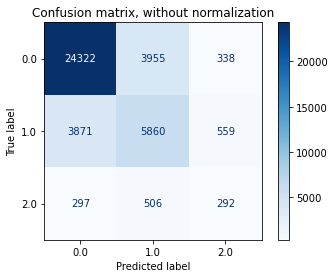

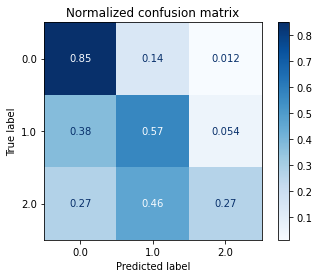

In [86]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)



In [87]:
print("Accuracy:",metrics.accuracy_score(Y_test, prediction))

Accuracy: 0.76185


In [88]:
print(classification_report(Y_test, prediction))


              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     28615
         1.0       0.57      0.57      0.57     10290
         2.0       0.25      0.27      0.26      1095

    accuracy                           0.76     40000
   macro avg       0.56      0.56      0.56     40000
weighted avg       0.76      0.76      0.76     40000



Random forest classifier 


In [88]:
RFC =RandomForestClassifier()

In [89]:
RFC.fit(X_train,Y_train.values.ravel())


RandomForestClassifier()

Confusion matrix, without normalization
[[25857  2737   162]
 [ 3123  6891   207]
 [  201   608   214]]
Normalized confusion matrix
[[0.89918626 0.09518014 0.00563361]
 [0.3055474  0.67420018 0.02025242]
 [0.19648094 0.5943304  0.20918866]]


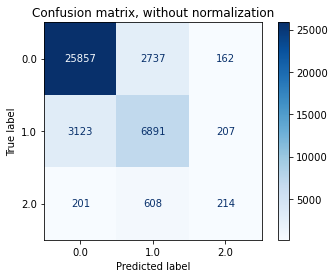

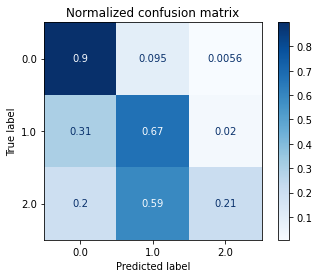

In [90]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(RFC, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [91]:
RFCprediction= RFC.predict(X_test)

In [92]:
print(confusion_matrix(Y_test, RFCprediction))

[[25857  2737   162]
 [ 3123  6891   207]
 [  201   608   214]]


In [93]:
print("Accuracy:",metrics.accuracy_score(Y_test, RFCprediction))


Accuracy: 0.82405


In [94]:
print(classification_report(Y_test, RFCprediction))


              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     28756
         1.0       0.67      0.67      0.67     10221
         2.0       0.37      0.21      0.27      1023

    accuracy                           0.82     40000
   macro avg       0.64      0.59      0.61     40000
weighted avg       0.82      0.82      0.82     40000



k neighrest neighbor classifier

In [95]:
KNN = KNeighborsClassifier(n_neighbors=3)


In [96]:
KNN.fit(X_train, Y_train.values.ravel())


KNeighborsClassifier(n_neighbors=3)

In [97]:
KNNprediction= KNN.predict(X_test)

Confusion matrix, without normalization
[[25335  3261   160]
 [ 4274  5743   204]
 [  340   543   140]]
Normalized confusion matrix
[[0.88103352 0.11340242 0.00556406]
 [0.41815869 0.5618824  0.01995891]
 [0.33235582 0.53079179 0.13685239]]


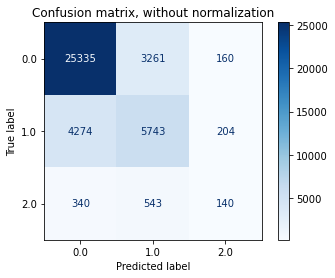

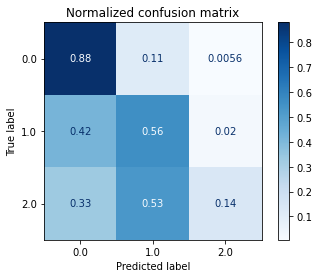

In [98]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(KNN, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [99]:
print(classification_report(Y_test, KNNprediction))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     28756
         1.0       0.60      0.56      0.58     10221
         2.0       0.28      0.14      0.18      1023

    accuracy                           0.78     40000
   macro avg       0.58      0.53      0.54     40000
weighted avg       0.77      0.78      0.77     40000



In [100]:
print("Accuracy:",metrics.accuracy_score(Y_test, KNNprediction))


Accuracy: 0.78045


Naive bayes Classifier

In [101]:
from sklearn.naive_bayes import GaussianNB


In [102]:
NBC = GaussianNB()


In [103]:
NBC.fit(X_train,Y_train.values.ravel())


GaussianNB()

In [104]:
NBprediction= NBC.predict(X_test)


Confusion matrix, without normalization
[[26169  1939   648]
 [ 5057  4455   709]
 [   91   393   539]]
Normalized confusion matrix
[[0.91003617 0.06742941 0.02253443]
 [0.49476568 0.43586733 0.06936699]
 [0.08895406 0.38416422 0.52688172]]


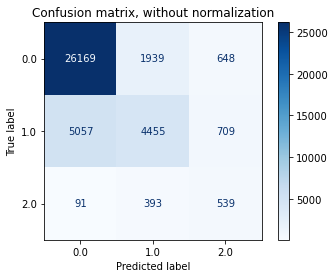

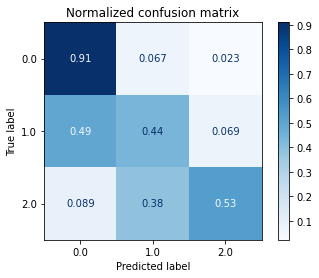

In [105]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(NBC, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [106]:
print(confusion_matrix(Y_test, NBprediction))


[[26169  1939   648]
 [ 5057  4455   709]
 [   91   393   539]]


In [107]:
print(classification_report(Y_test, NBprediction))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     28756
         1.0       0.66      0.44      0.52     10221
         2.0       0.28      0.53      0.37      1023

    accuracy                           0.78     40000
   macro avg       0.59      0.62      0.59     40000
weighted avg       0.78      0.78      0.77     40000



In [108]:
print("Accuracy:",metrics.accuracy_score(Y_test, NBprediction))

Accuracy: 0.779075
